Importing libraries has been successful
   Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US  
0         17   Yes  Yes  
1         10   Yes  Yes  
2         12   Yes  Yes  
3         14   Yes  Yes  
4         13   Yes   No  
(400, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Adver

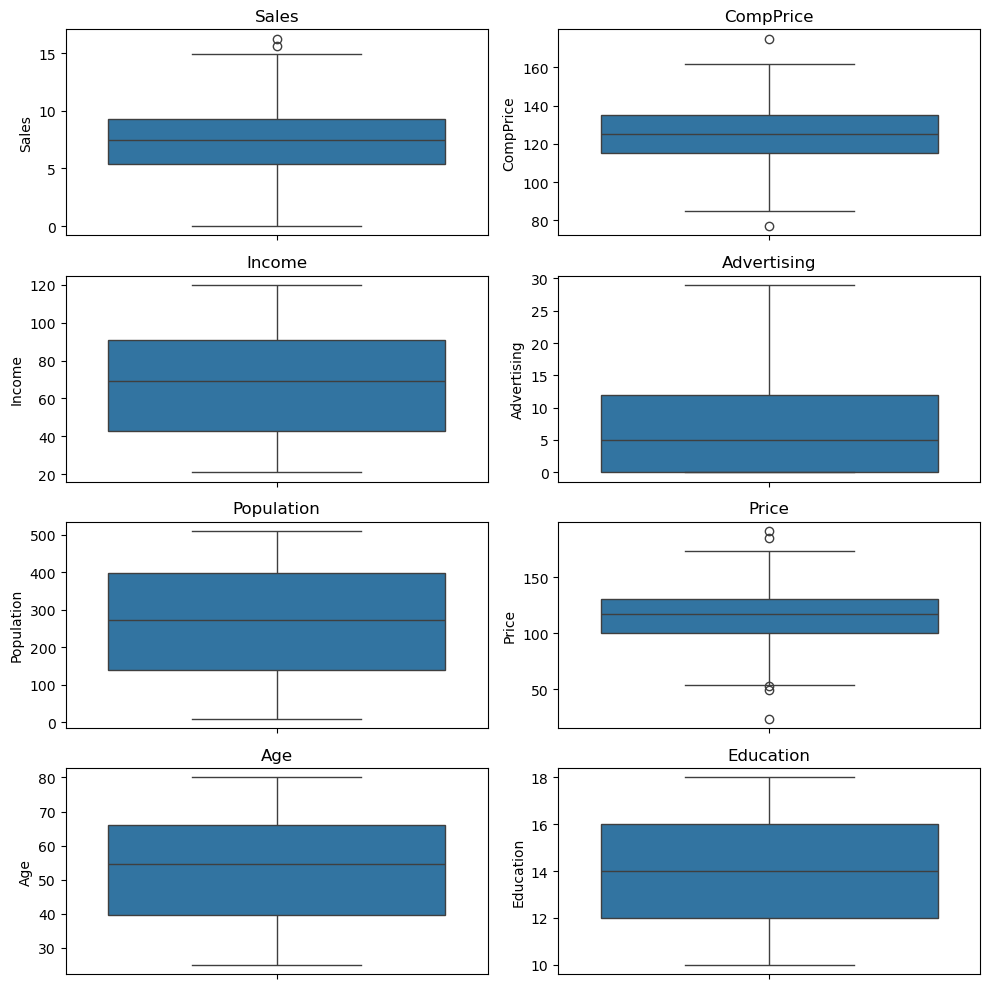

            Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000

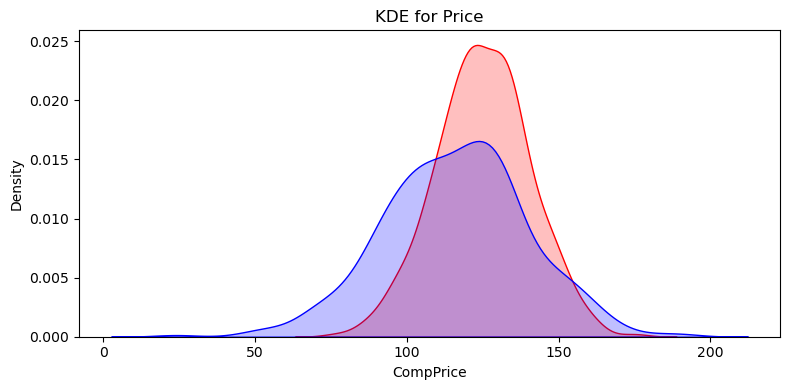

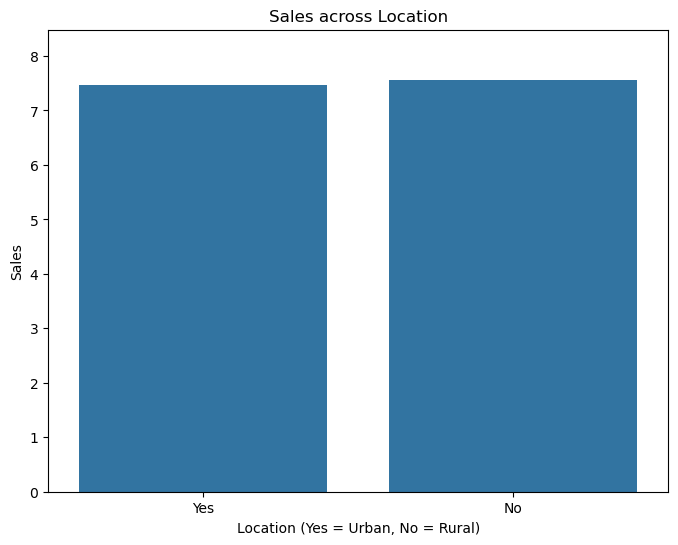

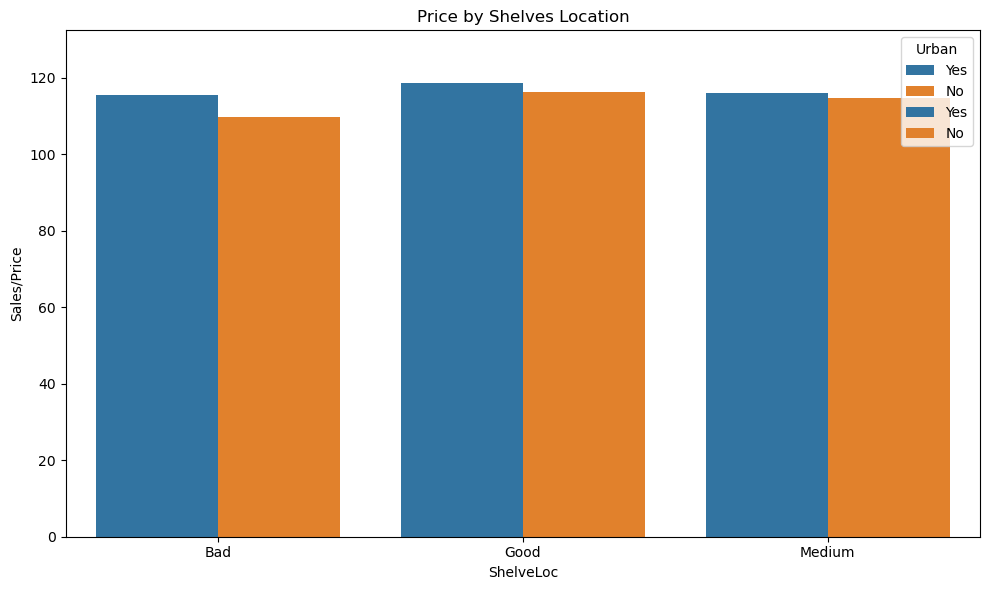

<Figure size 800x600 with 0 Axes>

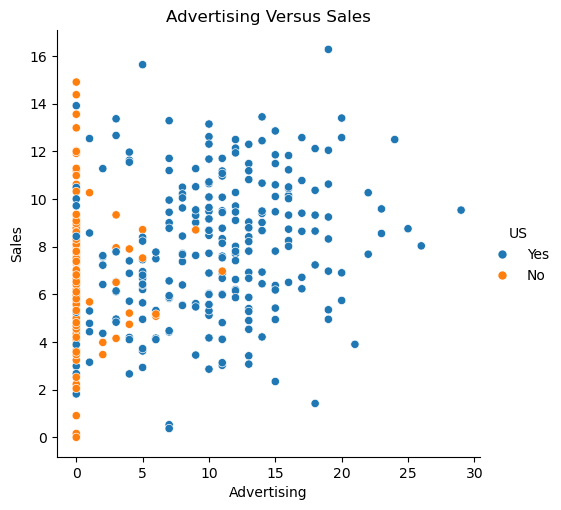

Accuracy of the model is: 73.33%
--------------Classification Report--------------------
              precision    recall  f1-score   support

        High       0.73      0.73      0.73        11
         Low       1.00      0.23      0.38        13
    Moderate       0.72      0.92      0.80        36

    accuracy                           0.73        60
   macro avg       0.81      0.62      0.64        60
weighted avg       0.78      0.73      0.70        60



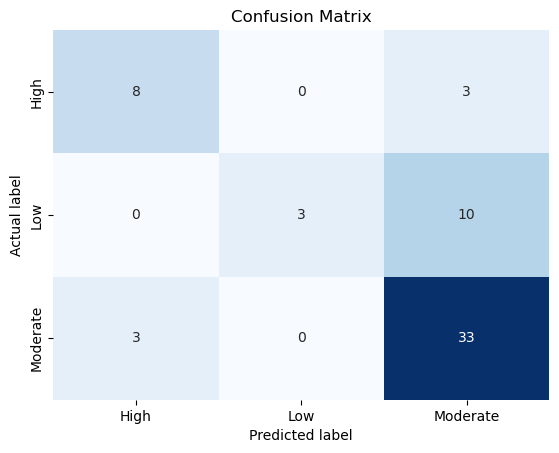

Total execution time is: 12.51 Seconds


In [3]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import time
import warnings
warnings.filterwarnings('ignore')

print("Importing libraries has been successful")

# Load the dataset
st = time.time()
data = pd.read_csv("G:/TOP-MENTOR/FILES/Sep 1st/Assignments/Random Forests_prj9 & 10/Company_Data.csv")
print(data.head())

# Preliminary data exploration
print(data.shape)
print(data.info())
print(data.isnull().sum())
print(data.duplicated().sum())

# Outlier detection with box plots
plt.figure(figsize=(10, 10))
for i, column in enumerate(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price', 'Age', 'Education'], start=1):
    plt.subplot(4, 2, i)
    sns.boxplot(data=data[column])
    plt.title(column)
plt.tight_layout()
plt.savefig("Box_plots.jpg")
plt.show()

# Exploratory data analysis
print(data.describe())

# Distribution of Price and Competitor price
plt.figure(figsize=(8, 4))
sns.kdeplot(data=data, x='CompPrice', fill=True, color='red').set_title('KDE for CompPrice')
sns.kdeplot(data=data, x='Price', fill=True, color='blue').set_title('KDE for Price')
plt.tight_layout()
plt.savefig("KDE_Plots.jpg")
plt.show()

# Influence of sales on Location (Urban or Rural)
plt.figure(figsize=(8, 6))
sns.barplot(data=data, x='Urban', y='Sales', errwidth=0)
plt.xlabel('Location (Yes = Urban, No = Rural)')
plt.ylabel('Sales')
plt.title("Sales across Location")
plt.savefig("Sales_by_Urban.jpg")
plt.show()

# Influence of Shelves Location on Price and Sales
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='ShelveLoc', y='Sales', hue='Urban', errwidth=0).set_title("Sales by Shelves Location")
sns.barplot(data=data, x='ShelveLoc', y='Price', hue='Urban', errwidth=0).set_title("Price by Shelves Location")
plt.xlabel('ShelveLoc')
plt.ylabel('Sales/Price')
plt.tight_layout()
plt.savefig("Shelves_Location.jpg")
plt.show()

# Influence of Advertising on Sales
plt.figure(figsize=(8, 6))
sns.relplot(data=data, x='Advertising', y='Sales', hue='US')
plt.title("Advertising Versus Sales")
plt.xlabel("Advertising")
plt.ylabel("Sales")
plt.savefig("Adv_versus_Sales.jpg")
plt.show()

# ML Modelling
# Transform Sales into categories
data['Sales'] = pd.cut(data['Sales'], bins=[-np.inf, 5, 10, np.inf], labels=['Low', 'Moderate', 'High'])

# Features and target
X = data.drop(columns=['Sales'])
y = data['Sales']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1234)

# Encode categorical variables
oe = OrdinalEncoder(categories=[['Bad', 'Medium', 'Good']])
X_train['ShelveLoc'] = oe.fit_transform(X_train[['ShelveLoc']])
X_test['ShelveLoc'] = oe.transform(X_test[['ShelveLoc']])

# One-Hot Encode 'Urban' and 'US'
ohe = OneHotEncoder(sparse_output=False, drop='first')
X_train_encoded = ohe.fit_transform(X_train[['Urban', 'US']])
X_test_encoded = ohe.transform(X_test[['Urban', 'US']])

# Combine encoded columns with the original features
X_train = X_train.drop(['Urban', 'US'], axis=1)
X_test = X_test.drop(['Urban', 'US'], axis=1)
X_train = np.hstack((X_train, X_train_encoded))
X_test = np.hstack((X_test, X_test_encoded))

# Label encoding for target column
le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

# Random Forest Classification
rf = RandomForestClassifier(n_estimators=500, max_depth=10, criterion='gini', random_state=2)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

# Model evaluation
rf_accuracy = accuracy_score(y_test, rf_pred) * 100
print(f'Accuracy of the model is: {rf_accuracy:.2f}%')
print("--------------Classification Report--------------------")
print(classification_report(y_test, rf_pred, target_names=le.classes_))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, rf_pred)
sns.heatmap(conf_matrix, annot=True, cmap='Blues', cbar=False, xticklabels=le.classes_, yticklabels=le.classes_)
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title("Confusion Matrix")
plt.show()

end = time.time()
print(f'Total execution time is: {(end - st):.2f} Seconds')
